## Final Project Submission

* Student name: Hoang Nguyen, Madoria Thomas, Marcelo Scatena
* Student pace: full time
* Scheduled project review date: 07/01/2021
* Instructor name: Skyler English


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from yellowbrick.features import Rank2D
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #Import necessary libraries
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import LabelEncoder
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import scipy.stats as stats
# from scipy.stats import pearsonr
# from itertools import combinations
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

### Find out where my missing values and fill them to make a first model with all the information we can:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
df['view'].fillna('NONE', inplace=True)

In [8]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
df['waterfront'].fillna('NO', inplace=True)

In [10]:
df['yr_renovated'].value_counts() 

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [12]:
# df.drop(['yr_renovated', 'waterfront'], axis=1, inplace=True)
# df.dropna(subset=['view'], inplace=True)
# df.head()

### Break down categorical values and objects:

In [13]:
# Convert grade to int
df['grade'] = df['grade'].apply(lambda x: x[:2] if x[0]=='1' else x[:1]).astype('int64')

In [14]:
# Remove ? and convert sqft_basement to int
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else int(x.split('.')[0]))

In [15]:
# Change waterfront to numeric
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x=='YES' else 0)

In [16]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [17]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [18]:
#Convert date column to 2 separate columns for month and year
date = df['date'].str.split('/', expand=True)
df['month_sold'] = date[0].astype('int64')
df['year_sold'] = date[2].astype('int64')

#Drop original date column
df.drop(columns=['date'], axis=1, inplace=True)

In [19]:
# Get_dummies of categorical values
df = pd.get_dummies(df, columns=['view', 'condition'], drop_first = True)

In [20]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,month_sold,year_sold,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,10,2014,0,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,12,2014,0,0,0,1,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,2,2015,0,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,12,2014,0,0,0,1,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,2,2015,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,8,1530,...,5,2014,0,0,0,1,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,8,2310,...,2,2015,0,0,0,1,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,7,1020,...,6,2014,0,0,0,1,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,8,1600,...,1,2015,0,0,0,1,0,0,0,0


In [21]:
# df_num.drop(['id'], axis=1, inplace=True)

In [22]:
X = df.drop('price', axis=1)
y = df['price']
model = sm.OLS(endog=y, exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1961.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:06:35   Log-Likelihood:            -2.9429e+05
No. Observations:               21597   AIC:                         5.886e+05
Df Residuals:                   21570   BIC:                         5.889e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
id                   -1.41e-06   4.81e-07     -2.933      0.003   -2.35e-06   -4.68e-07
bedrooms            -3.594e+04   1893.298    -18.981      0.000   -3.96e+04   -3.22e+04
bathrooms            4.143e+04   3255.727     12.726      0.000     3.5e+04    4.78e+04
sqft_living           107.0763     18.008      5.946      0.000      71.779     142.374
sqft_lot                0.1167      0.048      2.439      0.015       0.023       0.210
floors               8927.0167   3592.537      2.485      0.013    1885.379     1.6e+04
waterfront           5.467e+05   2.03e+04     26.906      0.000    5.07e+05    5.87e+05
grade                9.797e+04   2155.986     45.443      0.000    9.37e+04    1.02e+05
sqft_above             72.9569     18.001      4.053      0.000      37.674     108.240
sqft_basement          43.4576     17.840      2.436      0.015       8.489      78.426
yr_built            -2684.7049     71.942    -37.318      0.000   -2825.716   -2543.694
yr_renovated           23.0827      3.969      5.815      0.000      15.302      30.863
zipcode              -644.5780     31.908    -20.201      0.000    -707.120    -582.036
lat                      6e+05   1.07e+04     56.017      0.000    5.79e+05    6.21e+05
long                 -2.11e+05   1.31e+04    -16.055      0.000   -2.37e+05   -1.85e+05
sqft_living15          19.5449      3.437      5.687      0.000      12.808      26.282
sqft_lot15             -0.3963      0.073     -5.411      0.000      -0.540      -0.253
month_sold          -2303.8466    466.957     -4.934      0.000   -3219.116   -1388.577
year_sold            6785.7068   1389.105      4.885      0.000    4062.958    9508.455
view_EXCELLENT        2.31e+05   1.52e+04     15.205      0.000    2.01e+05    2.61e+05
view_FAIR             3.91e+04   1.28e+04      3.049      0.002     1.4e+04    6.42e+04
view_GOOD            7.269e+04   1.11e+04      6.573      0.000     5.1e+04    9.44e+04
view_NONE           -7.276e+04   6865.153    -10.598      0.000   -8.62e+04   -5.93e+04
condition_Fair       1.739e+04   1.56e+04      1.114      0.265   -1.32e+04     4.8e+04
condition_Good       2.249e+04   3463.805      6.493      0.000    1.57e+04    2.93e+04
condition_Poor      -1.676e+04   3.74e+04     -0.448      0.654   -9.01e+04    5.66e+04
condition_Very Good   6.32e+04   5535.221     11.418      0.000    5.24e+04     7.4e+04
==============================================================================
Omnibus:                    18393.916   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1902875.008
Skew:                           3.567   Prob(JB):                         0.00
Kurtosis:                      48.428   Cond. No.                     1.48e+11
================================================

### Split Data into Test and Train

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=23)

In [24]:
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
model

LinearRegression()

## Looking and dealing with outliers:

In [25]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [26]:
df = df[~df['bedrooms'].isin([33, 11, 10])]

#### Turn Bathrooms column into wc_comp and wc_inc:

In [27]:
df['wc_comp'] = df['bathrooms'].apply(lambda x: np.ceil(x) if str(x)[2] == '7' else np.floor(x))

In [28]:
df['wc_inc'] = df['bathrooms'].apply(lambda x: 1 if (str(x)[2] == '2') or (str(x)[2] == '5') else 0)

In [29]:
df.drop(['bathrooms'], axis=1, inplace=True)

#### Fix Floor column:

In [30]:
df['floors'] = df['floors'].apply(lambda x: np.ceil(x))

In [31]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [32]:
df

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,condition_Fair,condition_Good,condition_Poor,condition_Very Good,wc_comp,wc_inc
0,7129300520,221900.0,3,1180,5650,1.0,0,7,1180,0,...,0,0,0,1,0,0,0,0,1.0,0
1,6414100192,538000.0,3,2570,7242,2.0,0,7,2170,400,...,0,0,0,1,0,0,0,0,2.0,1
2,5631500400,180000.0,2,770,10000,1.0,0,6,770,0,...,0,0,0,1,0,0,0,0,1.0,0
3,2487200875,604000.0,4,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,1,3.0,0
4,1954400510,510000.0,3,1680,8080,1.0,0,8,1680,0,...,0,0,0,1,0,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,1530,1131,3.0,0,8,1530,0,...,0,0,0,1,0,0,0,0,2.0,1
21593,6600060120,400000.0,4,2310,5813,2.0,0,8,2310,0,...,0,0,0,1,0,0,0,0,2.0,1
21594,1523300141,402101.0,2,1020,1350,2.0,0,7,1020,0,...,0,0,0,1,0,0,0,0,1.0,0
21595,291310100,400000.0,3,1600,2388,2.0,0,8,1600,0,...,0,0,0,1,0,0,0,0,2.0,1


In [33]:
df['floors'].unique()

array([1., 2., 3., 4.])

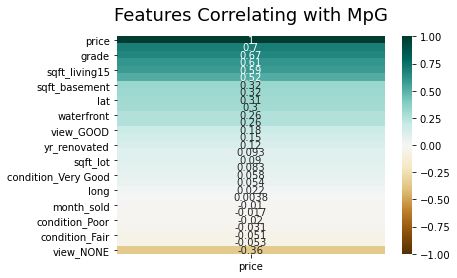

In [34]:
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with MpG', fontdict={'fontsize':18}, pad=16);

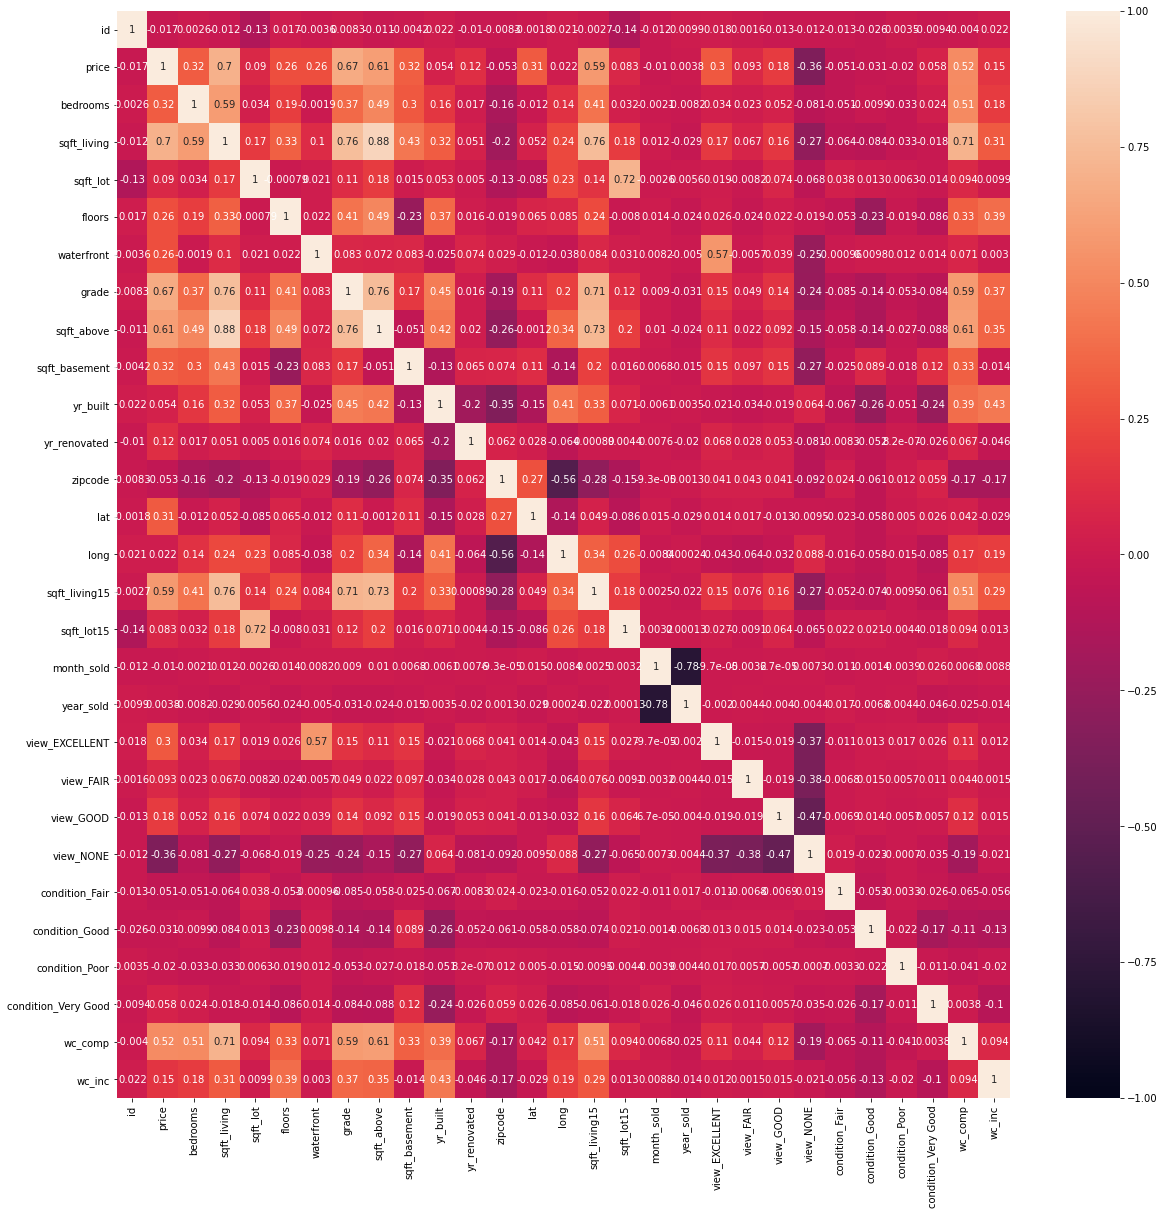

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

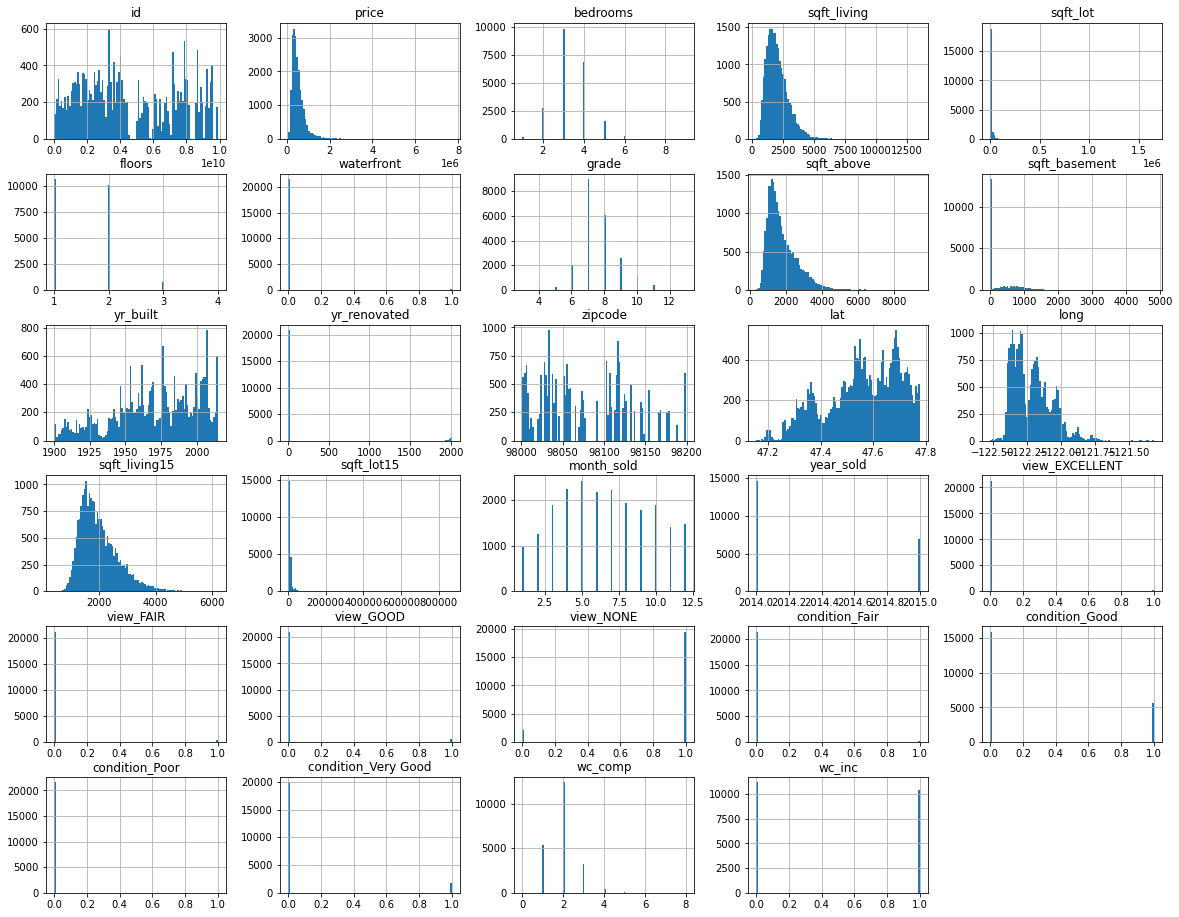

In [36]:
df.hist(bins=100, figsize=(20,16));

In [37]:
df['sqft_lot'].sort_values(ascending=False)[1000:]

18636    45535
9872     45528
1162     45517
15407    45514
17860    45302
         ...  
20588      635
3449       609
7582       600
5821       572
15729      520
Name: sqft_lot, Length: 20592, dtype: int64

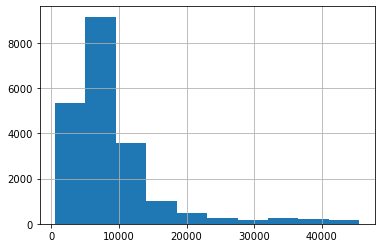

In [38]:
df['sqft_lot'].sort_values(ascending=False)[1000:].hist(bins=10);

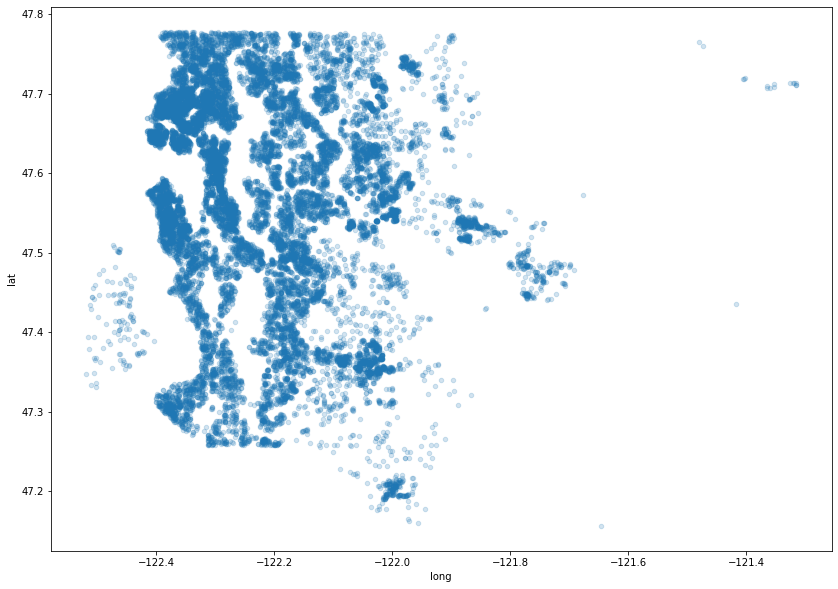

In [39]:
df.plot(kind='scatter', x='long', y='lat', alpha=0.2, figsize=(14,10));

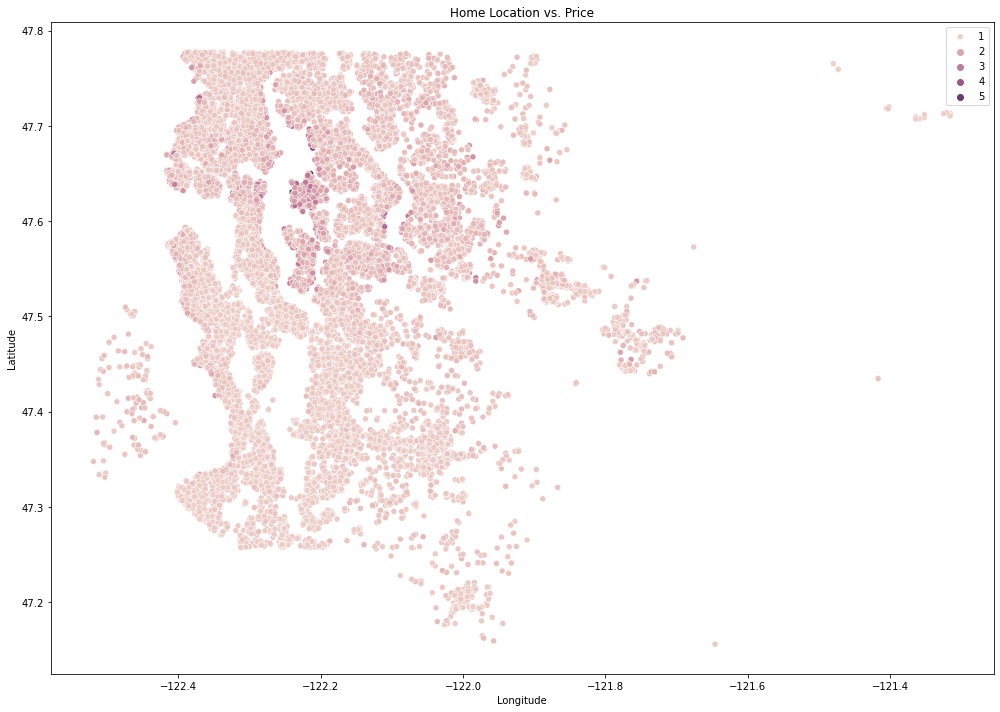

In [40]:
plt.figure(figsize=(14, 10))
plt.title('Home Location vs. Price')
sns.scatterplot(df['long'], df['lat'], hue=df['price'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend([1,2,3,4,5])
plt.tight_layout()

In [42]:
# df.drop(['view', 'condition', 'sqft_basement'], axis=1, inplace=True)

In [43]:
X = df.drop('price', axis=1)
y = df['price']

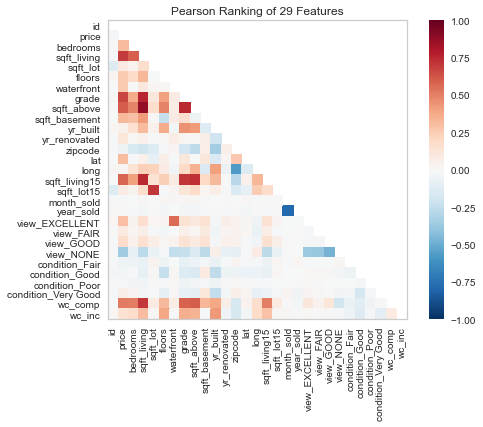

<AxesSubplot:title={'center':'Pearson Ranking of 29 Features'}>

In [44]:


visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df)
visualizer.show()